In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
from pathlib import Path

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import scipy.stats as stats

In [4]:
data_path = "../data/used-bikes.csv"  
df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head(10)

Shape: (5016, 13)


,Summary,url,Title,Post_Details,Bike Type,Brand,Trim/Edition,Model,Year,Mileage,Seller,Capacity,Price
0,"Atv beach bike 201435,000 kmKegalle, Motorbike...",https://ikman.lk/en/ad/atv-beach-bike-2014-for...,Atv beach bike 2014,"Posted on 30 Jan 9:02 am, Kegalle City, Kegalle",Quadricycles,Other brand,Atv beach bike,Other model,2014,"35,000 km",lakee,150 cc,"440,000"
1,"Bajaj Pulsar 150 palsar 201450,737 kmAnuradhap...",https://ikman.lk/en/ad/bajaj-pulsar-150-palsar...,Bajaj Pulsar 150 palsar 2014,"Posted on 11 Mar 1:58 pm, Kekirawa, Anuradhapura",Motorbikes,Bajaj,palsar 150,Pulsar 150,2014,"50,737 km",Sasila Ishan,150 cc,"370,000"
2,"Beach Buggy 20055,000 kmColombo, MotorbikesRs ...",https://ikman.lk/en/ad/beach-buggy-2005-for-sa...,Beach Buggy 2005,"Posted on 21 Jan 9:45 pm, Talawatugoda, Colombo",Quadricycles,Other brand,Beach Buggy,Other model,2005,"5,000 km",vinuka automart,125 cc,"210,000"
3,"Electra Alpha Vino 2019600 kmColombo, Motorbik...",https://ikman.lk/en/ad/electra-alfa-vino-2019-...,Electra Alpha Vino 2019,"Posted on 22 Feb 2:26 pm, Moratuwa, Colombo",E-bikes,Electra,Vino,Alpha,2019,600 km,Jeewantha Basnayaka,49 cc,"105,000"
4,"Hero Maestro Edge 201818,500 kmMEMBERKalutara,...",https://ikman.lk/en/ad/hero-maestro-edge-2018-...,Hero Maestro Edge 2018,"Posted on 07 Mar 2:08 pm, Bandaragama, Kalutara",Scooters,Hero,2018,Maestro Edge,2018,"18,500 km",Anjalee Motors,110 cc,"80,000"
5,"Honda CBR 650R 202012,700 kmGalle, MotorbikesR...",https://ikman.lk/en/ad/honda-cbr-650r-2020-for...,Honda CBR 650R 2020,"Posted on 10 Feb 10:00 am, Galle City, Galle",Motorbikes,Honda,650R,CBR,2020,"12,700 km",Anne Filishiya Ross thuring,650 cc,"889,000"
6,"Honda CBR 650R 202015,000 kmColombo, Motorbike...",https://ikman.lk/en/ad/honda-cbr-cbr650r-2020-...,Honda CBR 650R 2020,"Posted on 18 Jan 12:56 pm, Maharagama, Colombo",Motorbikes,Honda,CBR 650R,CBR,2020,"15,000 km",Dream Bikes,650 cc,"2,500,000"
7,"Honda CRF 250R 200810,000 kmGampaha, Motorbike...",https://ikman.lk/en/ad/honda-crf-250r-2008-for...,Honda CRF 250R 2008,"Posted on 30 Jan 4:29 pm, Ja-Ela, Gampaha",Motorbikes,Honda,CRF 250R,CRF,2008,"10,000 km",shehan,250 cc,"1,400,000"
8,"Honda Dio 201025,000 kmKurunegala, MotorbikesR...",https://ikman.lk/en/ad/honda-dio-2010-for-sale...,Honda Dio 2010,"Posted on 18 Feb 12:07 pm, Kurunegala City, Ku...",Scooters,Honda,NaN,Dio,2010,"25,000 km",Julatha Bandara,48 cc,"125,000"
9,"Honda Hornet CH 125 200217,200 kmKegalle, Moto...",https://ikman.lk/en/ad/honda-hornet-ch-125-unr...,Honda Hornet CH 125 2002,"Posted on 26 Jan 2:32 pm, Kegalle City, Kegalle",Motorbikes,Honda,CH 125,Hornet,2002,"17,200 km",Shehan,250 cc,"780,000"


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Summary       5016 non-null   object
 1   url           5016 non-null   object
 2   Title         5016 non-null   object
 3   Post_Details  5016 non-null   object
 4   Bike Type     5016 non-null   object
 5   Brand         5016 non-null   object
 6   Trim/Edition  3815 non-null   object
 7   Model         5016 non-null   object
 8   Year          5016 non-null   int64 
 9   Mileage       5016 non-null   object
 10  Seller        5013 non-null   object
 11  Capacity      5016 non-null   object
 12  Price         5016 non-null   object
dtypes: int64(1), object(12)
memory usage: 509.6+ KB
None


In [5]:
df = df.drop(['Summary', 'url', 'Title', 'Post_Details','Trim/Edition'],axis=1)


In [6]:
# Clean Mileage: remove commas and ' km'
df['Mileage'] = (
    df['Mileage']
    .str.replace(',', '', regex=False)
    .str.replace(' km', '', regex=False)
    .astype(float)
)

# Clean Capacity: remove ' cc'
df['Capacity'] = (
    df['Capacity']
    .str.replace(',', '', regex=False)
    .str.replace(' cc', '', regex=False)
    .astype(float)
)

# Clean Price: remove commas
df['Price'] = df['Price'].str.replace(',', '', regex=False).astype(float)

print(df)
print(df.dtypes)


         Bike Type        Brand         Model  Year  Mileage  \
0     Quadricycles  Other brand   Other model  2014  35000.0   
1       Motorbikes        Bajaj    Pulsar 150  2014  50737.0   
2     Quadricycles  Other brand   Other model  2005   5000.0   
3          E-bikes      Electra         Alpha  2019    600.0   
4         Scooters         Hero  Maestro Edge  2018  18500.0   
...            ...          ...           ...   ...      ...   
5011    Motorbikes       Yamaha   Other Model  2015  30000.0   
5012    Motorbikes       Yamaha   Other Model  1988  20000.0   
5013    Motorbikes       Yamaha   Other Model  2015  32270.0   
5014    Motorbikes       Yamaha   Other Model  2018  12780.0   
5015    Motorbikes       Yamaha           YZF  2017  18000.0   

                             Seller  Capacity      Price  
0                             lakee     150.0   440000.0  
1                      Sasila Ishan     150.0   370000.0  
2                   vinuka automart     125.0   210000

In [8]:
df.isnull().sum()
df = df.dropna().reset_index(drop=True)
print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (5013, 8)


In [9]:
# Drop exact duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("After dedup shape:", df.shape)

After dedup shape: (4977, 8)


In [ ]:
df["LogPrice"] = np.log1p(df["Price"]) 


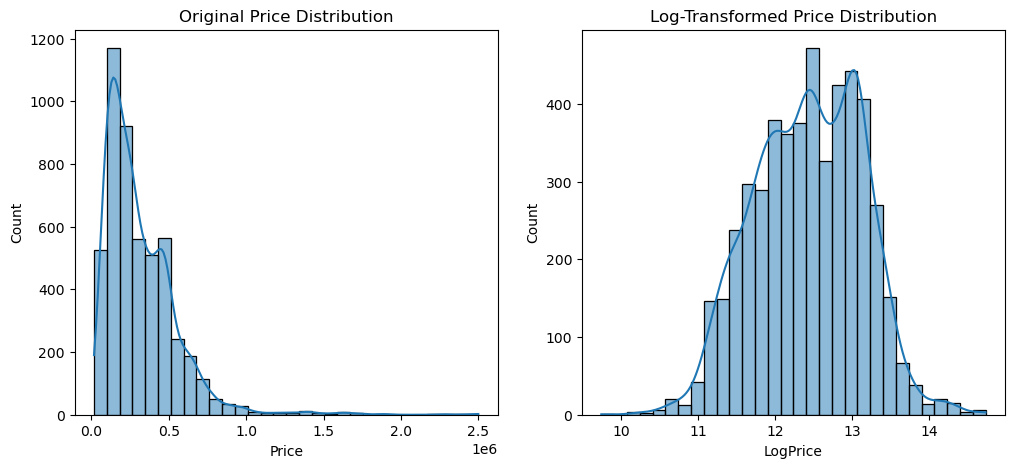

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Original Price Distribution")

plt.subplot(1,2,2)
sns.histplot(df["LogPrice"], bins=30, kde=True)
plt.title("Log-Transformed Price Distribution")

plt.show()

### Model Training

In [52]:
df.to_csv("../data/used-bikes-cleaned.csv", index=False)

In [53]:
df = pd.read_csv("../data/used-bikes-cleaned.csv")
df.shape

(4977, 9)

In [54]:
X = df.drop(["Price", "LogPrice"], axis=1)
y = df["Price"]

In [55]:
X

,Bike Type,Brand,Model,Year,Mileage,Seller,Capacity
0,Quadricycles,Other brand,Other model,2014,35000.0,lakee,150.0
1,Motorbikes,Bajaj,Pulsar 150,2014,50737.0,Sasila Ishan,150.0
2,Quadricycles,Other brand,Other model,2005,5000.0,vinuka automart,125.0
3,E-bikes,Electra,Alpha,2019,600.0,Jeewantha Basnayaka,49.0
4,Scooters,Hero,Maestro Edge,2018,18500.0,Anjalee Motors,110.0
...,...,...,...,...,...,...,...
4972,Motorbikes,Yamaha,Other Model,2015,30000.0,Dulshan Thaksara,250.0
4973,Motorbikes,Yamaha,Other Model,1988,20000.0,PW Farm,50.0
4974,Motorbikes,Yamaha,Other Model,2015,32270.0,PLS Motors & Credit (Pvt) Ltd,125.0
4975,Motorbikes,Yamaha,Other Model,2018,12780.0,Ranjith Japanese Motorcycles,125.0


In [56]:
y

0        440000.0
1        370000.0
2        210000.0
3        105000.0
4         80000.0
          ...    
4972     580000.0
4973     125000.0
4974     250000.0
4975     320000.0
4976    1550000.0
Name: Price, Length: 4977, dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

(3981, 7) (996, 7)


In [58]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)



Numeric: ['Year', 'Mileage', 'Capacity']
Categorical: ['Bike Type', 'Brand', 'Model', 'Seller']


In [ ]:
# Numeric pipeline: impute median + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# Categorical pipeline: impute constant + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.fit_transform(X_test)

In [60]:
print("Processed train shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Processed train shape: (3981, 2789)
Processed test shape: (996, 2789)
y_train shape: (3981,)
y_test shape: (996,)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.4528


In [37]:
scores = []

for i in range(1000):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_processed, y_train)
    
    y_pred = model.predict(X_test_processed)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)

print("Average R²:", np.mean(scores))
print("Best R²:", np.max(scores))


Average R²: 0.42012915510807025
Best R²: 0.6599492036560264


In [38]:
np.argmax(scores)


np.int64(588)

In [39]:
scores[np.argmax(scores)]


0.6599492036560264

In [ ]:
# np.argmax(scores) = 588
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))
    
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
    
model = LinearRegression()
model.fit(X_train_processed, y_train)
    
y_pred = model.predict(X_test_processed)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.6599


In [41]:
import pickle
with open('../models/linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [63]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42, n_jobs=-1)
}

for name, model in models.items():
    pipe = Pipeline(steps=[('pre', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R²={r2:.4f}, MAE={mae:.2f}")


Linear: R²=0.4528, MAE=115817.31
Ridge: R²=0.6072, MAE=99107.49
RandomForest: R²=0.7322, MAE=73413.80
XGBoost: R²=0.7354, MAE=80221.40


### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(rf, param_distributions=param_dist,
                            n_iter=30, cv=3, scoring='r2', n_jobs=-1, verbose=2)
search.fit(X_train_processed, y_train)

print("Best R²:", search.best_score_)
print("Best Parameters:", search.best_params_)



Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best R²: 0.4616870542153202
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [69]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with best parameters
final_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    random_state=42,
    n_jobs=-1
)
            
# Fit on the full training data
final_rf.fit(X_train_processed, y_train)


# Evaluate on test data
y_pred = final_rf.predict(X_test_processed)

from sklearn.metrics import mean_absolute_error, r2_score
print("Final R²:", r2_score(y_test, y_pred))
print("Final MAE:", mean_absolute_error(y_test, y_pred))


Final R²: 0.5249644459136541
Final MAE: 120709.10331196063


In [70]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)
params = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}
grid = GridSearchCV(xgb, params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train_processed, y_train)
print(grid.best_params_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 600, 'subsample': 0.9}


In [71]:
final_xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=42,
    n_jobs=-1
)
final_xgb.fit(X_train_processed, y_train)
y_pred = final_xgb.predict(X_test_processed)
print("Final XGB R²:", r2_score(y_test, y_pred))
print("Final XGB MAE:", mean_absolute_error(y_test, y_pred))

Final XGB R²: 0.7518242488510856
Final XGB MAE: 74682.87555348346


### Apply Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    random_state=42,
    n_jobs=-1
)

# Combine preprocessing + model into a single pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf)
])

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)

print(f"Cross-Validation R² Scores: {scores}")
print(f"Average CV R²: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-Validation R² Scores: [0.51161354 0.48136184 0.50500765 0.46971203 0.46087862]
Average CV R²: 0.4857 ± 0.0197


In [73]:
final_xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_xgb)
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)
print(f"XGB Cross-Validation R² Scores: {scores}")
print(f"Average XGB CV R²: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

XGB Cross-Validation R² Scores: [0.7381203  0.67128909 0.71920425 0.67592449 0.67458111]
Average XGB CV R²: 0.6958 ± 0.0275
